<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Sbu-logo.svg/1200px-Sbu-logo.svg.png" width="600" height="600">
</div>

<h1 align="center"> Digital Image Processing </h1>
<h2 align="center">Second Section</h2>
<h5 align="center">Mobin Nesari</h5>

In [105]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

## Task 1
In this task, a picture should be given and transform it to cartoon format.

Load a test image and plot it

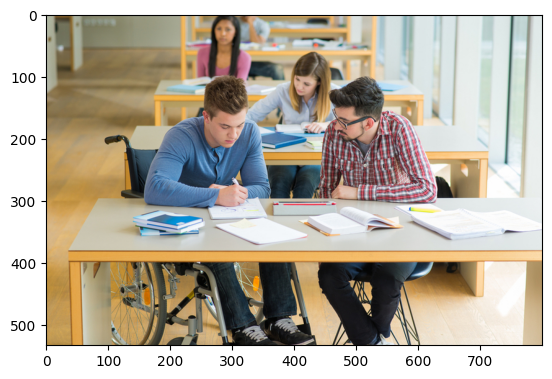

In [106]:
input_image = cv2.imread("test.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)
plt.imshow(input_image)
plt.show()

In `chalk_cartoonize_image` function, this function gets an image. First it converts it to grayscale color space. Then applies bilateral filter to reduce noise while keeping edges sharp. After that uses `cv2.Canny` to detect edges and at the end, applies bitwise AND operation with edges mask.

In [107]:
def chalk_cartoonize_image(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filtering to reduce noise while keeping edges sharp
    filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

    # Detect edges in the image
    edges = cv2.Canny(gray_image, 60, 180)

    # Apply a bitwise AND operation on the filtered image and the detected edges
    # This will create a black and white sketch-like effect
    cartoon_image = cv2.bitwise_and(filtered_image, filtered_image, mask=edges)

    return cartoon_image

Applying `chalk_cartoonize_image` on test image and plot result

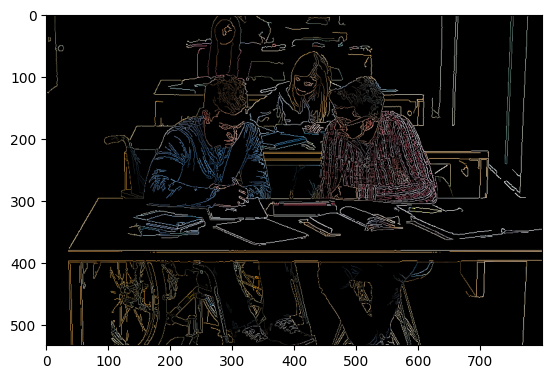

In [108]:
cartoon_image = chalk_cartoonize_image(input_image)
plt.imshow(cartoon_image)
plt.show()


The `blurry_cartoonize_image` function takes an image as input and applies several modifications to create a blurry cartoon effect. It first converts the image to grayscale, applies median blur to reduce noise, detects edges using adaptive thresholding, and then combines color and edges using bilateral filter and bitwise_and operator. The resulting image highlights edges and creates a cartoon-like effect. Finally, the modified image is returned as output.

In [109]:
def blurry_cartoonize_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to reduce noise
    blur = cv2.medianBlur(gray, 5)

    # Detect edges using adaptive thresholding
    edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Combine color and edges using bitwise_and operator
    color = cv2.bilateralFilter(image, 7, 250, 250)
    cartoon = cv2.bitwise_and(color, color, mask=edge)

    return cartoon

Applying `blurry_cartoonize_image` function on test image.

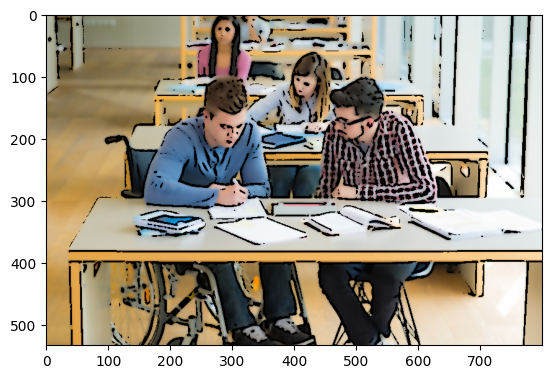

In [110]:
cartoon_image2 = blurry_cartoonize_image(input_image)
plt.imshow(cartoon_image2)
plt.show()

## Task 2

### MSE Criterion:

In [129]:
def add_noise_and_filter_mse(image, noise_intensity, filter_degree):
    # Add Gaussian noise with specified intensity
    noisy_image = image.copy()
    mean = 0
    var = noise_intensity
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, noisy_image.shape)
    noisy_image = noisy_image.astype(np.float32) + gauss
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Apply Gaussian mean filter with specified degree
    filtered_image = cv2.GaussianBlur(noisy_image, (filter_degree, filter_degree), 0)

    # Compute Mean Squared Error (MSE) between the original and filtered image
    mse = ((image.astype(np.float32) - filtered_image.astype(np.float32)) ** 2).mean()

    return filtered_image, noisy_image, mse


#### Lenna Image:

Best noise intensity: 100
Best filter degree: 3
Best MSE: 36.55269241333008
Worst noise intensity: 9000
Worst filter degree: 3
Worst MSE: 1002.8191528320312


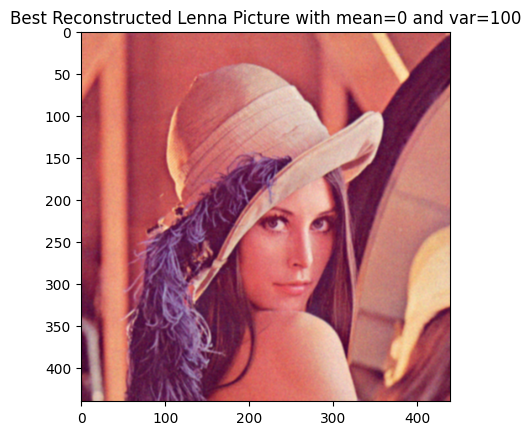

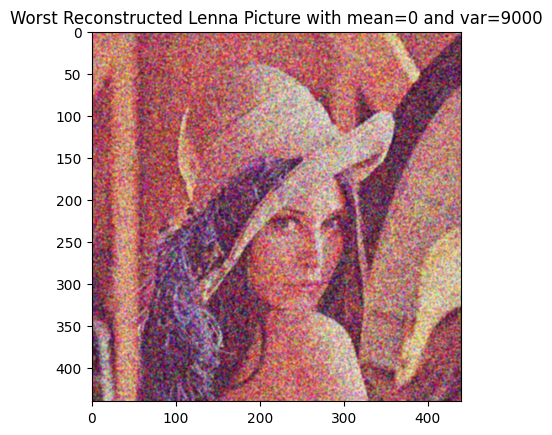

In [155]:
# Load the input image
image = cv2.imread('lenna.png')

# Define the range of noise intensity and filter degree to try
noise_intensities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
filter_degrees = [3, 5, 7, 9, 11, 13]

# Find the best parameters by minimizing the MSE
best_mse = float('inf')
worst_mse = 0
best_degrees = {}
for noise_intensity in noise_intensities:
    best_case_mse = float('inf')
    best_case_degree = -1
    for filter_degree in filter_degrees:
        filtered_image, noisy_image, mse = add_noise_and_filter_mse(image, noise_intensity, filter_degree)
        if mse < best_mse:
            best_mse = mse
            best_noise_intensity = noise_intensity
            best_filter_degree = filter_degree
        if mse < best_case_mse:
            best_case_mse = mse
            best_case_degree = filter_degree
        if mse > worst_mse:
            worst_mse = mse
            worst_noise_intensity = noise_intensity
            worst_filter_degree = filter_degree
    
    best_degrees[noise_intensity] = best_case_degree

print(f'Best noise intensity: {best_noise_intensity}')
print(f'Best filter degree: {best_filter_degree}')
print(f'Best MSE: {best_mse}')
print(f'Worst noise intensity: {worst_noise_intensity}')
print(f'Worst filter degree: {worst_filter_degree}')
print(f'Worst MSE: {worst_mse}')
plt.imshow(cv2.cvtColor(add_noise_and_filter_mse(image, best_noise_intensity, best_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title(f"Best Reconstructed Lenna Picture with mean={0} and var={best_noise_intensity}")
plt.show()
plt.imshow(cv2.cvtColor(add_noise_and_filter_mse(image, worst_noise_intensity, worst_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title(f"Worst Reconstructed Lenna Picture with mean={0} and var={worst_noise_intensity}")
plt.show()

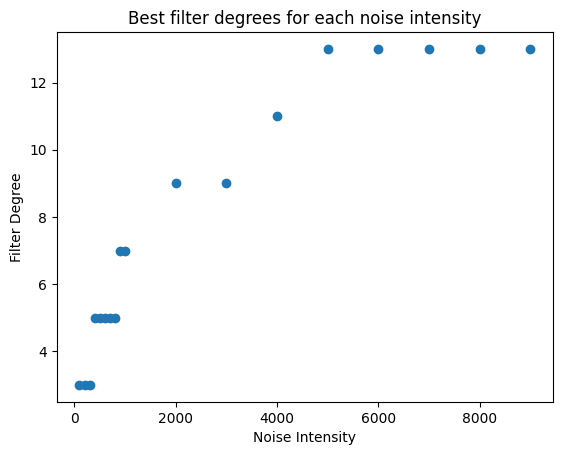

In [156]:
X = best_degrees.keys()
Y = [best_degrees[k] for k in X]
plt.scatter(X, Y)
plt.title(f"Best filter degrees for each noise intensity")
plt.xlabel("Noise Intensity")
plt.ylabel("Filter Degree")
plt.show()

#### Cameraman Image:

Best noise intensity: 100
Best filter degree: 3
Best MSE: 118.2298812866211
Worst noise intensity: 9000
Worst filter degree: 3
Worst MSE: 1160.34228515625


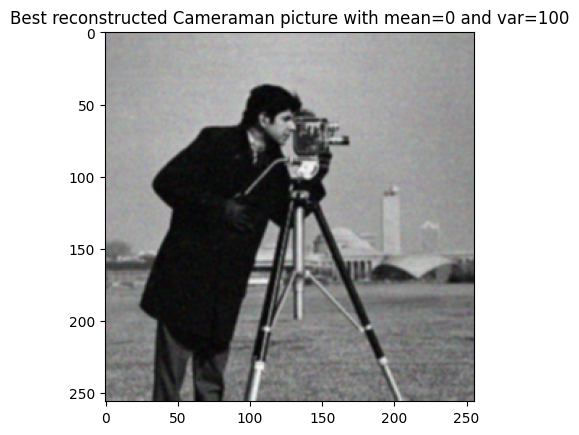

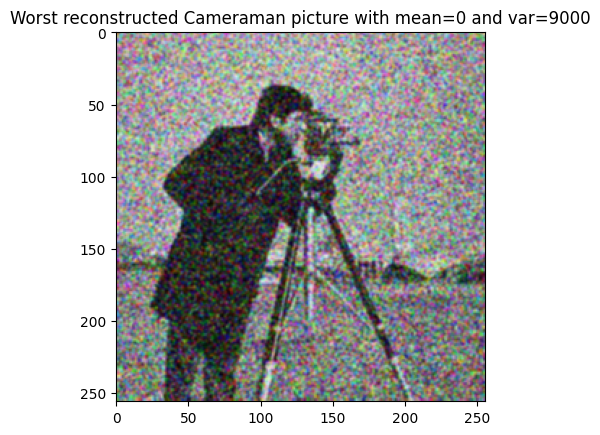

In [159]:
# Load the input image
image = cv2.imread('cameraman.jpg')

# Define the range of noise intensity and filter degree to try
noise_intensities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
filter_degrees = [3, 5, 7, 9, 11, 13]

# Find the best parameters by minimizing the MSE
best_mse = float('inf')
worst_mse = 0
best_degrees = {}
for noise_intensity in noise_intensities:
    best_case_mse = float('inf')
    best_case_degree = -1
    for filter_degree in filter_degrees:
        filtered_image, noisy_image, mse = add_noise_and_filter_mse(image, noise_intensity, filter_degree)
        if mse < best_mse:
            best_mse = mse
            best_noise_intensity = noise_intensity
            best_filter_degree = filter_degree
        if mse < best_case_mse:
            best_case_mse = mse
            best_case_degree = filter_degree
        if mse > worst_mse:
            worst_mse = mse
            worst_noise_intensity = noise_intensity
            worst_filter_degree = filter_degree
    best_degrees[noise_intensity] = best_case_degree

print(f'Best noise intensity: {best_noise_intensity}')
print(f'Best filter degree: {best_filter_degree}')
print(f'Best MSE: {best_mse}')
print(f'Worst noise intensity: {worst_noise_intensity}')
print(f'Worst filter degree: {worst_filter_degree}')
print(f'Worst MSE: {worst_mse}')
plt.imshow(cv2.cvtColor(add_noise_and_filter_mse(image, best_noise_intensity, best_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title(f"Best reconstructed Cameraman picture with mean={0} and var={best_noise_intensity}")
plt.show()
plt.imshow(cv2.cvtColor(add_noise_and_filter_mse(image, worst_noise_intensity, worst_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title(f"Worst reconstructed Cameraman picture with mean={0} and var={worst_noise_intensity}")
plt.show()

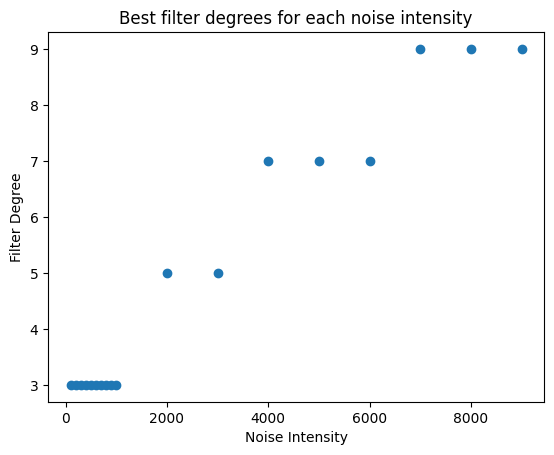

In [161]:
X = best_degrees.keys()
Y = [best_degrees[k] for k in X]
plt.scatter(X, Y)
plt.title(f"Best filter degrees for each noise intensity")
plt.xlabel("Noise Intensity")
plt.ylabel("Filter Degree")
plt.show()

#### Baboon Image:

Best noise intensity: 100
Best filter degree: 3
Best MSE: 315.8277587890625
Worst noise intensity: 9000
Worst filter degree: 3
Worst MSE: 1284.5418701171875


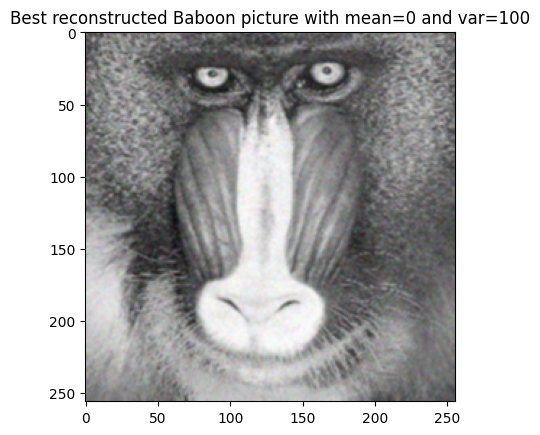

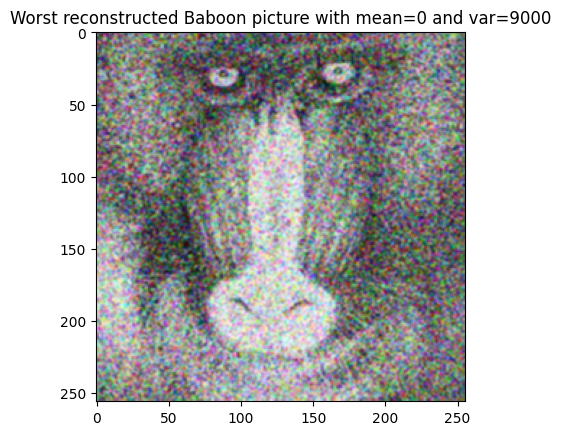

In [162]:
# Load the input image
image = cv2.imread('baboon.bmp')

# Define the range of noise intensity and filter degree to try
noise_intensities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
filter_degrees = [3, 5, 7, 9, 11, 13]

# Find the best parameters by minimizing the MSE
best_mse = float('inf')
worst_mse = 0
best_degrees = {}
for noise_intensity in noise_intensities:
    best_case_mse = float('inf')
    best_case_degree = -1
    for filter_degree in filter_degrees:
        filtered_image, noisy_image, mse = add_noise_and_filter_mse(image, noise_intensity, filter_degree)
        if mse < best_mse:
            best_mse = mse
            best_noise_intensity = noise_intensity
            best_filter_degree = filter_degree
        if mse < best_case_mse:
            best_case_mse = mse
            best_case_degree = filter_degree
        if mse > worst_mse:
            worst_mse = mse
            worst_noise_intensity = noise_intensity
            worst_filter_degree = filter_degree
    best_degrees[noise_intensity] = best_case_degree

print(f'Best noise intensity: {best_noise_intensity}')
print(f'Best filter degree: {best_filter_degree}')
print(f'Best MSE: {best_mse}')
print(f'Worst noise intensity: {worst_noise_intensity}')
print(f'Worst filter degree: {worst_filter_degree}')
print(f'Worst MSE: {worst_mse}')
plt.imshow(cv2.cvtColor(add_noise_and_filter_mse(image, best_noise_intensity, best_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title(f"Best reconstructed Baboon picture with mean={0} and var={best_noise_intensity}")
plt.show()
plt.imshow(cv2.cvtColor(add_noise_and_filter_mse(image, worst_noise_intensity, worst_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title(f"Worst reconstructed Baboon picture with mean={0} and var={worst_noise_intensity}")
plt.show()

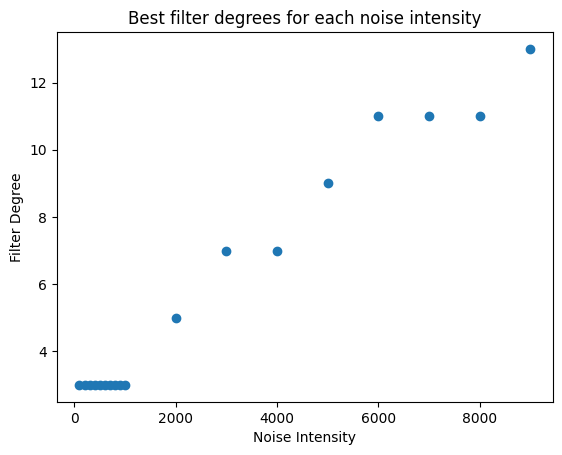

In [164]:
X = best_degrees.keys()
Y = [best_degrees[k] for k in X]
plt.scatter(X, Y)
plt.title(f"Best filter degrees for each noise intensity")
plt.xlabel("Noise Intensity")
plt.ylabel("Filter Degree")
plt.show()

### PSNR Criterion:

In [118]:
def add_noise_and_filter_psnr(image, noise_intensity, filter_degree):
    # Add Gaussian noise with specified intensity
    noisy_image = image.copy()
    mean = 0
    var = noise_intensity
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, noisy_image.shape)
    noisy_image = noisy_image.astype(np.float32) + gauss
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Apply Gaussian mean filter with specified degree
    filtered_image = cv2.GaussianBlur(noisy_image, (filter_degree, filter_degree), 0)

    # Compute Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) between the original and filtered image
    mse = ((image.astype(np.float32) - filtered_image.astype(np.float32)) ** 2).mean()
    L = 255
    PSNR = 10 * np.log10(L ** 2 / mse)

    return filtered_image, noisy_image, PSNR


Best noise intensity: 100
Best filter degree: 3
Best PSNR: 32.49440849429775
Worst noise intensity: 9000
Worst filter degree: 3
Worst PSNR: 18.098813508332572


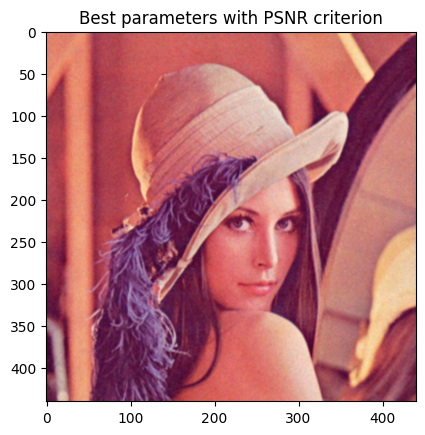

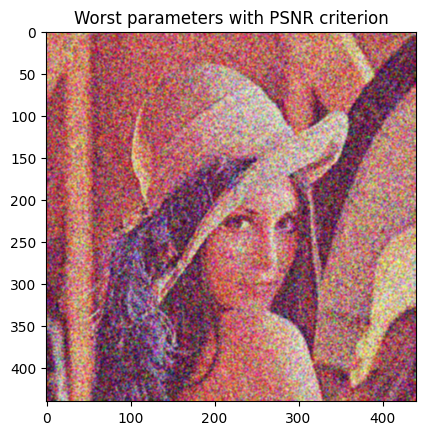

In [172]:
# Load the input image
image = cv2.imread('lenna.png')

# Define the range of noise intensity and filter degree to try
noise_intensities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
filter_degrees = [3, 5, 7, 9, 11, 13]

# Find the best parameters by minimizing the MSE
best_psnr = 0
worst_psnr = float("inf")
best_degrees = {}
for noise_intensity in noise_intensities:
    best_case_psnr = 0
    best_case_degree = -1
    for filter_degree in filter_degrees:
        filtered_image, noisy_image, psnr = add_noise_and_filter_psnr(image, noise_intensity, filter_degree)
        if psnr > best_psnr:
            best_psnr = psnr
            best_noise_intensity = noise_intensity
            best_filter_degree = filter_degree
        if psnr > best_case_psnr:
            best_case_psnr = psnr
            best_case_degree = filter_degree
        if psnr < worst_psnr:
            worst_psnr = psnr
            worst_noise_intensity = noise_intensity
            worst_filter_degree = filter_degree
    
    best_degrees[noise_intensity] = best_case_degree

print(f'Best noise intensity: {best_noise_intensity}')
print(f'Best filter degree: {best_filter_degree}')
print(f'Best PSNR: {best_psnr}')
print(f'Worst noise intensity: {worst_noise_intensity}')
print(f'Worst filter degree: {worst_filter_degree}')
print(f'Worst PSNR: {worst_psnr}')
plt.imshow(cv2.cvtColor(add_noise_and_filter_psnr(image, best_noise_intensity, best_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title("Best parameters with PSNR criterion")
plt.show()
plt.imshow(cv2.cvtColor(add_noise_and_filter_psnr(image, worst_noise_intensity, worst_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title("Worst parameters with PSNR criterion")
plt.show()

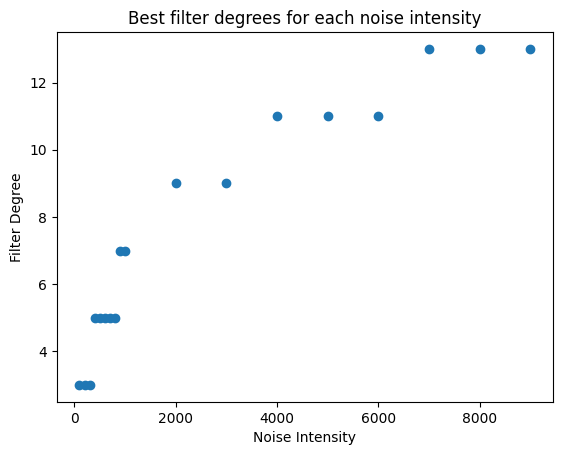

In [173]:
X = best_degrees.keys()
Y = [best_degrees[k] for k in X]
plt.scatter(X, Y)
plt.title(f"Best filter degrees for each noise intensity")
plt.xlabel("Noise Intensity")
plt.ylabel("Filter Degree")
plt.show()

Best noise intensity: 100
Best filter degree: 3
Best PSNR: 27.416553101083068
Worst noise intensity: 9000
Worst filter degree: 3
Worst PSNR: 17.508664207898534


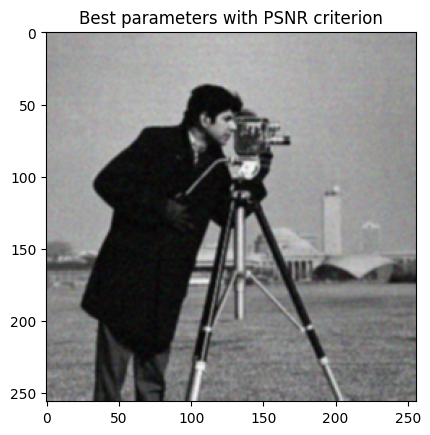

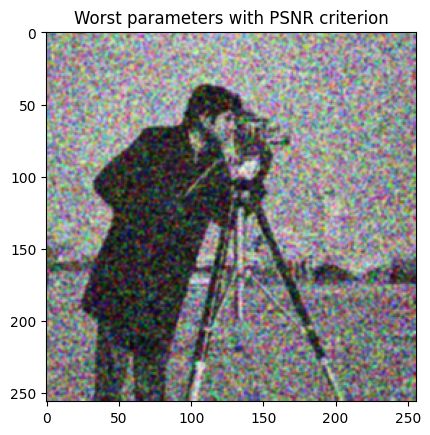

In [174]:
# Load the input image
image = cv2.imread('cameraman.jpg')

# Define the range of noise intensity and filter degree to try
noise_intensities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
filter_degrees = [3, 5, 7, 9, 11, 13]

# Find the best parameters by minimizing the MSE
best_psnr = 0
worst_psnr = float("inf")
best_degrees = {}
for noise_intensity in noise_intensities:
    best_case_psnr = 0
    best_case_degree = -1
    for filter_degree in filter_degrees:
        filtered_image, noisy_image, psnr = add_noise_and_filter_psnr(image, noise_intensity, filter_degree)
        if psnr > best_psnr:
            best_psnr = psnr
            best_noise_intensity = noise_intensity
            best_filter_degree = filter_degree
        if psnr > best_case_psnr:
            best_case_psnr = psnr
            best_case_degree = filter_degree
        if psnr < worst_psnr:
            worst_psnr = psnr
            worst_noise_intensity = noise_intensity
            worst_filter_degree = filter_degree
    
    best_degrees[noise_intensity] = best_case_degree

print(f'Best noise intensity: {best_noise_intensity}')
print(f'Best filter degree: {best_filter_degree}')
print(f'Best PSNR: {best_psnr}')
print(f'Worst noise intensity: {worst_noise_intensity}')
print(f'Worst filter degree: {worst_filter_degree}')
print(f'Worst PSNR: {worst_psnr}')
plt.imshow(cv2.cvtColor(add_noise_and_filter_psnr(image, best_noise_intensity, best_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title("Best parameters with PSNR criterion")
plt.show()
plt.imshow(cv2.cvtColor(add_noise_and_filter_psnr(image, worst_noise_intensity, worst_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title("Worst parameters with PSNR criterion")
plt.show()

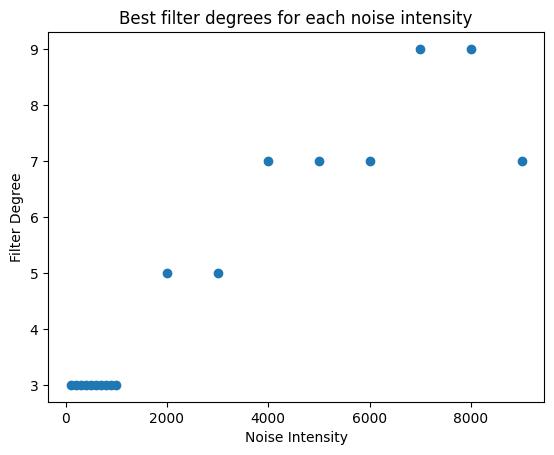

In [175]:
X = best_degrees.keys()
Y = [best_degrees[k] for k in X]
plt.scatter(X, Y)
plt.title(f"Best filter degrees for each noise intensity")
plt.xlabel("Noise Intensity")
plt.ylabel("Filter Degree")
plt.show()

Best noise intensity: 100
Best filter degree: 3
Best PSNR: 23.137282289478378
Worst noise intensity: 9000
Worst filter degree: 3
Worst PSNR: 16.96746814134526


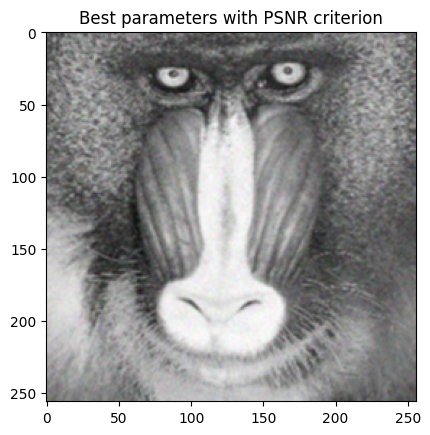

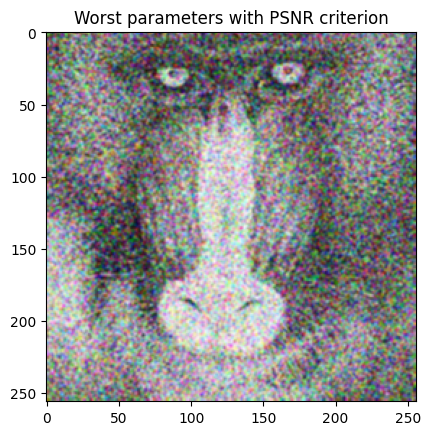

In [176]:
# Load the input image
image = cv2.imread('baboon.bmp')

# Define the range of noise intensity and filter degree to try
noise_intensities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
filter_degrees = [3, 5, 7, 9, 11, 13]

# Find the best parameters by minimizing the MSE
best_psnr = 0
worst_psnr = float("inf")
best_degrees = {}
for noise_intensity in noise_intensities:
    best_case_psnr = 0
    best_case_degree = -1
    for filter_degree in filter_degrees:
        filtered_image, noisy_image, psnr = add_noise_and_filter_psnr(image, noise_intensity, filter_degree)
        if psnr > best_psnr:
            best_psnr = psnr
            best_noise_intensity = noise_intensity
            best_filter_degree = filter_degree
        if psnr > best_case_psnr:
            best_case_psnr = psnr
            best_case_degree = filter_degree
        if psnr < worst_psnr:
            worst_psnr = psnr
            worst_noise_intensity = noise_intensity
            worst_filter_degree = filter_degree
    
    best_degrees[noise_intensity] = best_case_degree

print(f'Best noise intensity: {best_noise_intensity}')
print(f'Best filter degree: {best_filter_degree}')
print(f'Best PSNR: {best_psnr}')
print(f'Worst noise intensity: {worst_noise_intensity}')
print(f'Worst filter degree: {worst_filter_degree}')
print(f'Worst PSNR: {worst_psnr}')
plt.imshow(cv2.cvtColor(add_noise_and_filter_psnr(image, best_noise_intensity, best_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title("Best parameters with PSNR criterion")
plt.show()
plt.imshow(cv2.cvtColor(add_noise_and_filter_psnr(image, worst_noise_intensity, worst_filter_degree)[0], cv2.COLOR_BGR2RGB))
plt.title("Worst parameters with PSNR criterion")
plt.show()

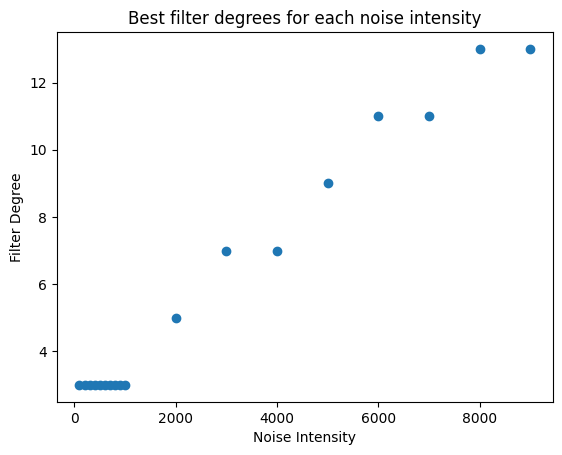

In [177]:
X = best_degrees.keys()
Y = [best_degrees[k] for k in X]
plt.scatter(X, Y)
plt.title(f"Best filter degrees for each noise intensity")
plt.xlabel("Noise Intensity")
plt.ylabel("Filter Degree")
plt.show()